# Exploratory Data Analysis

This notebook performs a detailed EDA on the `train.csv` dataset used for sentiment classification. We aim to understand the distribution of sentiment labels, the structure of the conversation texts, and identify any data quality issues.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
sns.set(style="whitegrid")

## Load Dataset

In [2]:
df = pd.read_csv("data/train.csv")
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (970, 11)


,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation
0,Login and Account,Mobile Number and Email Verification,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Oven Toaster Grills (OTG),medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...
1,Cancellations and returns,Pickup and Shipping,Reasons for being asked to ship the item,Pickup and Shipping -> Reasons for being asked...,neutral,Electronics,Computer Monitor,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox customer...
2,Cancellations and returns,Replacement and Return Process,Inability to click the 'Cancel' button,Replacement and Return Process -> Inability to...,neutral,Appliances,Juicer/Mixer/Grinder,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for calling BrownBox Customer...
3,Login and Account,Login Issues and Error Messages,Error message regarding exceeded attempts to e...,Login Issues and Error Messages -> Error messa...,neutral,Appliances,Water Purifier,less,inexperienced,"may struggle with ambiguous queries, rely on c...","Customer: Hi, I am facing an issue while loggi..."
4,Order,Order Delivery Issues,Delivery not attempted again,Order Delivery Issues -> Delivery not attempte...,negative,Electronics,Bp Monitor,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for contacting BrownBox custo...


## Basic Information and Missing Values

In [3]:
print("\nColumn info:\n")
df.info()

print("\nMissing values:\n")
print(df.isnull().sum())


Column info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   issue_area                   970 non-null    object
 1   issue_category               970 non-null    object
 2   issue_sub_category           970 non-null    object
 3   issue_category_sub_category  970 non-null    object
 4   customer_sentiment           970 non-null    object
 5   product_category             970 non-null    object
 6   product_sub_category         970 non-null    object
 7   issue_complexity             970 non-null    object
 8   agent_experience_level       970 non-null    object
 9   agent_experience_level_desc  970 non-null    object
 10  conversation                 970 non-null    object
dtypes: object(11)
memory usage: 83.5+ KB

Missing values:

issue_area                     0
issue_category                 0
issue_sub_cat

## Sentiment Distribution (Counts + Percentages)

/var/folders/zn/vf7dcg9j5yx547py9_y411jw0000gn/T/ipykernel_47473/2170281568.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="customer_sentiment", data=df, order=df["customer_sentiment"].value_counts().index, palette="pastel")


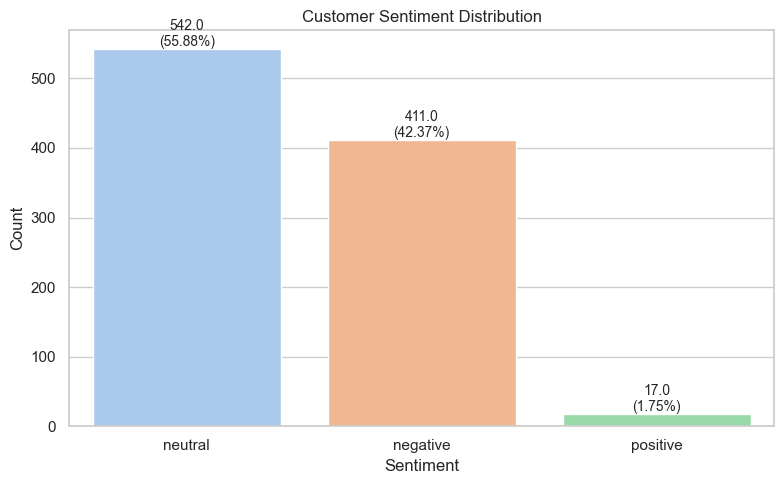


Sentiment class counts:
 customer_sentiment
neutral     542
negative    411
positive     17
Name: count, dtype: int64

Sentiment class proportions (%):
 customer_sentiment
neutral     55.88
negative    42.37
positive     1.75
Name: proportion, dtype: float64


In [4]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="customer_sentiment", data=df, order=df["customer_sentiment"].value_counts().index, palette="pastel")
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f"{100 * count / total:.2f}%"
    ax.annotate(f"{count}\n({percentage})", (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom', fontsize=10)
plt.title("Customer Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Print stats
print("\nSentiment class counts:\n", df["customer_sentiment"].value_counts())
print("\nSentiment class proportions (%):\n", df["customer_sentiment"].value_counts(normalize=True).mul(100).round(2))

## Conversation Length Analysis

count     970.000000
mean     2129.284536
std       564.751035
min        46.000000
25%      1760.250000
50%      2058.500000
75%      2430.000000
max      5708.000000
Name: text_length, dtype: float64


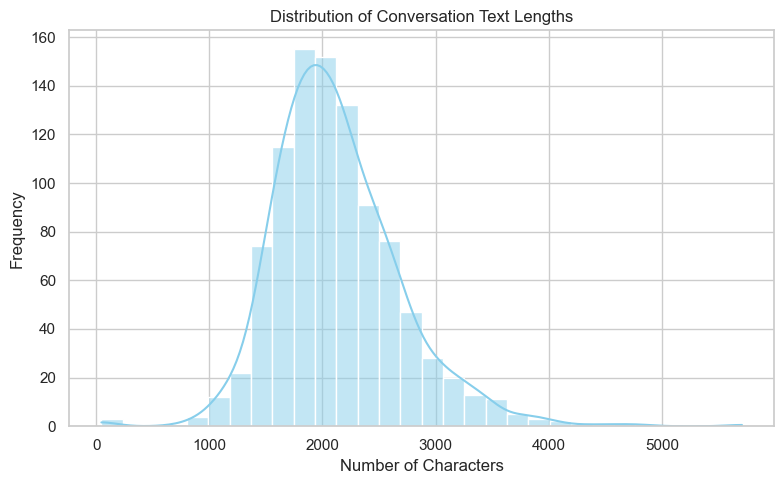

In [5]:
df["text_length"] = df["conversation"].astype(str).apply(len)
print(df["text_length"].describe())

plt.figure(figsize=(8, 5))
sns.histplot(df["text_length"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Conversation Text Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

/var/folders/zn/vf7dcg9j5yx547py9_y411jw0000gn/T/ipykernel_47473/2482493516.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="customer_sentiment", y="conversation_length", palette="Set2")


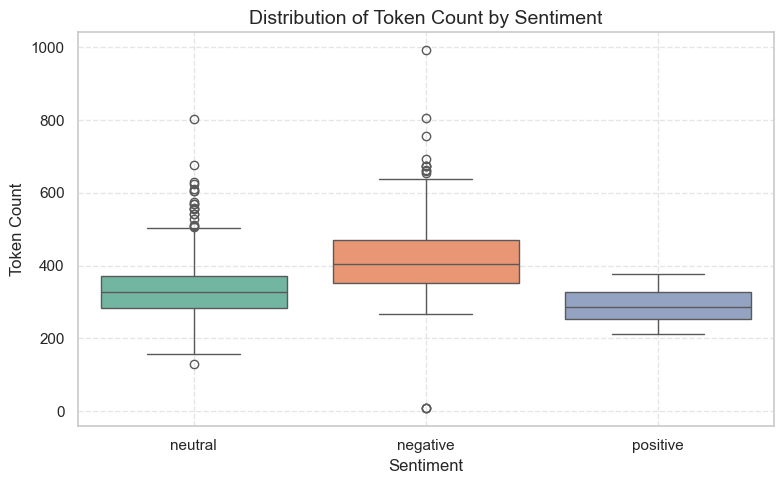

,count,mean,std,min,25%,50%,75%,max
customer_sentiment,,,,,,,,
negative,411.0,417.67,101.35,8.0,351.5,406.0,471.5,992.0
neutral,542.0,337.78,80.60,129.0,285.0,329.0,373.0,802.0
positive,17.0,294.00,48.18,213.0,253.0,286.0,329.0,378.0


In [6]:
# Create the column first
df["conversation_length"] = df["conversation"].astype(str).apply(lambda x: len(x.split()))

# Token count boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="customer_sentiment", y="conversation_length", palette="Set2")
plt.title("Distribution of Token Count by Sentiment", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Token Count", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Summary statistics per class
summary_stats = df.groupby("customer_sentiment")["conversation_length"].describe().round(2)
display(summary_stats)


## Sentiment vs Product Category

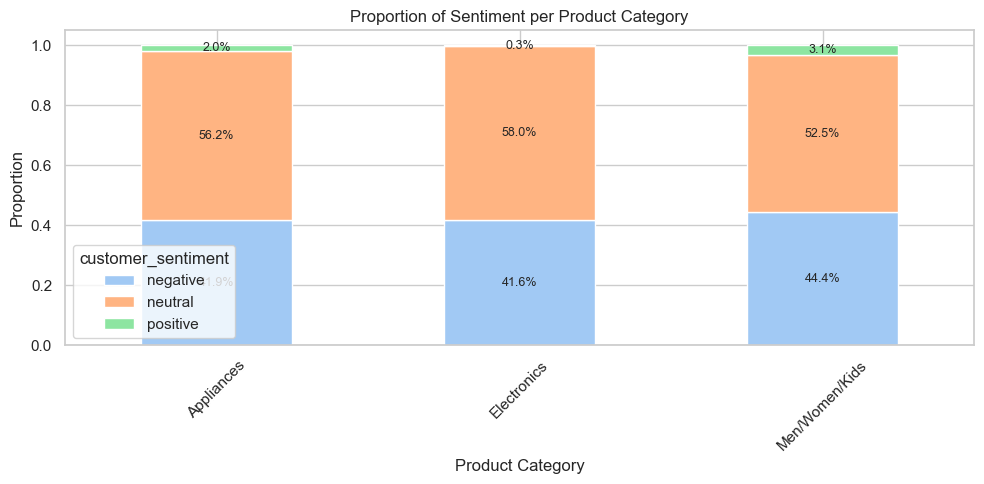

In [7]:
# Create the cross-tabulation
ctab = pd.crosstab(df["product_category"], df["customer_sentiment"], normalize='index')

ax = ctab.plot(kind='bar', stacked=True, color=sns.color_palette("pastel"), figsize=(10, 5))

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f"{height * 100:.1f}%",
                ha='center', va='center', fontsize=9
            )

plt.title("Proportion of Sentiment per Product Category")
plt.ylabel("Proportion")
plt.xlabel("Product Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Word Cloud Visualization

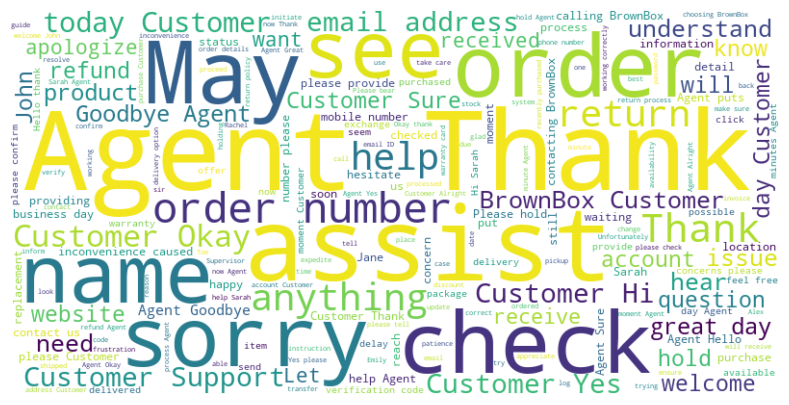

In [8]:
text = " ".join(df["conversation"].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(15, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Statistical Correlation Analysis with Sentiment
To determine if there is a statistically significant relationship between `customer_sentiment` and other features, we apply Chi-Square tests for categorical variables and ANOVA for numerical variables like conversation length.

In [9]:
from scipy.stats import chi2_contingency, f_oneway

def chi_square_analysis(feature):
    table = pd.crosstab(df[feature], df['customer_sentiment'])
    chi2, p, dof, expected = chi2_contingency(table)
    print(f"\n🔍 Chi-Square Test for {feature} vs customer_sentiment:")
    print(f"Chi2 Statistic: {chi2:.2f}, p-value: {p:.4f}, Degrees of Freedom: {dof}")
    
    # Check assumption: expected frequencies
    low_expected = (expected < 5).sum()
    total_cells = expected.size
    percent_low = (100 * low_expected / total_cells)
    if percent_low > 20:
        print(f"⚠️ Warning: {percent_low:.1f}% of expected frequencies < 5 — may violate assumptions.")
    else:
        print("✅ Expected frequency condition appears satisfied.")

    if p < 0.05:
        print("✅ Significant association found.")
    else:
        print("❌ No significant association.")

# Run Chi-Square on categorical features
categorical_features = ['issue_area', 'product_category', 'issue_complexity', 'agent_experience_level']
for feature in categorical_features:
    chi_square_analysis(feature)


🔍 Chi-Square Test for issue_area vs customer_sentiment:
Chi2 Statistic: 168.89, p-value: 0.0000, Degrees of Freedom: 10
⚠️ Warning: 33.3% of expected frequencies < 5 — may violate assumptions.
✅ Significant association found.

🔍 Chi-Square Test for product_category vs customer_sentiment:
Chi2 Statistic: 6.91, p-value: 0.1409, Degrees of Freedom: 4
✅ Expected frequency condition appears satisfied.
❌ No significant association.

🔍 Chi-Square Test for issue_complexity vs customer_sentiment:
Chi2 Statistic: 3.30, p-value: 0.5089, Degrees of Freedom: 4
✅ Expected frequency condition appears satisfied.
❌ No significant association.

🔍 Chi-Square Test for agent_experience_level vs customer_sentiment:
Chi2 Statistic: 9.26, p-value: 0.0549, Degrees of Freedom: 4
✅ Expected frequency condition appears satisfied.
❌ No significant association.


In [10]:
# ANOVA: Does conversation_length vary by sentiment?
df['conversation_length'] = df['conversation'].astype(str).apply(lambda x: len(x.split()))
groups = [group['conversation_length'].values for name, group in df.groupby('customer_sentiment')]

print("\n🔍 ANOVA Test: conversation_length ~ customer_sentiment")
f_stat, p_val = f_oneway(*groups)
print(f"F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")
if p_val < 0.05:
    print("✅ Significant difference in conversation length across sentiments.")
else:
    print("❌ No significant difference in conversation length.")


🔍 ANOVA Test: conversation_length ~ customer_sentiment
F-statistic: 99.28, p-value: 0.0000
✅ Significant difference in conversation length across sentiments.


## 📌 Final EDA Summary & Insights
- 🔹 **Sentiment Distribution**: 'Neutral' dominates the dataset (~56%), while 'positive' sentiment is only ~2%, indicating class imbalance.
- 🔹 **Conversation Length**: ANOVA yields an F-statistic of 99.28 with a p-value < 0.0001, indicating strong evidence that average conversation lengths differ across sentiments. This suggests that conversation length is likely an informative feature for the sentiment classification task, with longer conversations potentially associated with negative or more complex customer experiences.
- 🔹 **Chi-Square Analysis**: Only issue_area showed a significant association with sentiment (Chi² = 168.89, p < 0.001), indicating that the type of issue impacts customer sentiment. However, 33.3% of expected counts were <5, so results should be interpreted with caution.